In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

tf.enable_eager_execution()

In [2]:
tf.executing_eagerly()

True

In [3]:
x = [[2.]]
m = tf.matmul(x, x)
m

<tf.Tensor: id=3, shape=(1, 1), dtype=float32, numpy=array([[ 4.]], dtype=float32)>

In [4]:
m

<tf.Tensor: id=3, shape=(1, 1), dtype=float32, numpy=array([[ 4.]], dtype=float32)>

In [5]:
a = tf.constant([
    [1, 2],
    [3, 4]
])

b = tf.add(a, 1)
b

<tf.Tensor: id=8, shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

## Linear Regression using Eager

In [6]:
import numpy as np
X_data = np.random.random((10000, 2))
X_data                          

array([[ 0.76531615,  0.98176562],
       [ 0.79609166,  0.49991327],
       [ 0.09176825,  0.70759621],
       ..., 
       [ 0.2551933 ,  0.15016576],
       [ 0.37946797,  0.87818367],
       [ 0.90007508,  0.24246571]])

In [7]:
sample_weights = np.array([[3, 4]])

In [8]:
y_data = np.matmul(X_data, sample_weights.transpose())
y_data.shape

(10000, 1)

In [9]:
# Add noise to data
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [10]:
# Split dat to training & testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)

In [11]:
tfe = tf.contrib.eager

In [12]:
W = tfe.Variable([[1.0, 1.0]])
b = tfe.Variable(np.random.uniform(-0.2, 0.2))

In [13]:
# Linear Regression
def linear_regression(inputs):
    return tf.matmul(inputs, W, transpose_b=True)

In [14]:
# Loss funciton mean square error
def loss_function(model_fn, inputs, labels):
    return tf.reduce_mean(tf.square(model_fn(inputs) - labels))

In [15]:
# Parameters
learning_rate = 0.002
num_steps = 10000

In [16]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Calculate gradient
grad = tfe.implicit_gradients(loss_function)

In [17]:
# Training model

for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, np.float32(X_train), np.float32(y_train)))
    
    if step % 100 == 0:
        train_loss = loss_function(linear_regression, np.float32(X_train), np.float32(y_train))
        test_loss = loss_function(linear_regression, np.float32(X_test), np.float32(y_test))
        
        print('Step {} train loss = {} test loss = {}'.format(step, train_loss, test_loss))

Step 0 train loss = 6.969114303588867 test loss = 7.010822296142578
Step 100 train loss = 4.37306547164917 test loss = 4.4019389152526855
Step 200 train loss = 2.748354434967041 test loss = 2.768526077270508
Step 300 train loss = 1.7312756776809692 test loss = 1.7454900741577148
Step 400 train loss = 1.0943257808685303 test loss = 1.1044201850891113
Step 500 train loss = 0.6951960325241089 test loss = 0.7024117708206177
Step 600 train loss = 0.44486862421035767 test loss = 0.4500541090965271
Step 700 train loss = 0.2876625955104828 test loss = 0.291402667760849
Step 800 train loss = 0.1887432038784027 test loss = 0.19144505262374878
Step 900 train loss = 0.12632042169570923 test loss = 0.12827061116695404
Step 1000 train loss = 0.08676113933324814 test loss = 0.08816330134868622
Step 1100 train loss = 0.061536531895399094 test loss = 0.06253653764724731
Step 1200 train loss = 0.04530852660536766 test loss = 0.04601191729307175
Step 1300 train loss = 0.034737732261419296 test loss = 0.0

In [18]:
W.numpy()

array([[ 2.95835924,  3.92088723]], dtype=float32)

In [19]:
b.numpy()

0.12190419

In [25]:
y_pred = linear_regression(np.float32(X_test))
y_pred

<tf.Tensor: id=221841, shape=(2000, 1), dtype=float32, numpy=
array([[ 3.15347838],
       [ 4.38564014],
       [ 4.37034607],
       ..., 
       [ 5.4850502 ],
       [ 4.0295248 ],
       [ 2.16041327]], dtype=float32)>

In [30]:
y_test

array([[ 3.13779581],
       [ 4.39562584],
       [ 4.37815686],
       ..., 
       [ 5.51393698],
       [ 4.02926942],
       [ 2.12441659]])

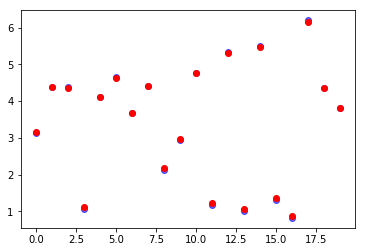

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_test[:20])), y_test[:20], 'bo', alpha=0.6)
plt.plot(range(len(y_pred.numpy()[:20])), y_pred.numpy()[:20], 'ro')
plt.show()